In [3]:
import numpy as np
import pandas as pd

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [7]:
recipes = pd.read_csv('../tutorial_data/SVM Data/Cupcakes vs Muffins.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,56,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


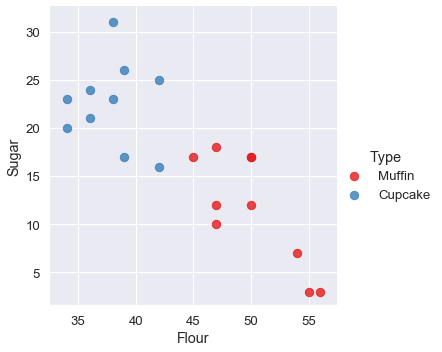

In [10]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={'s': 70})

/Users/austinjung/.pyenv/versions/3.6.9/envs/ciitizen-document-classification-service/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


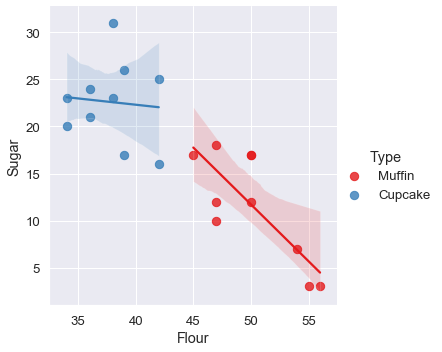

In [11]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=True, scatter_kws={'s': 70})

### Format for pre-process our data

In [12]:
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [14]:
ingredients = recipes[recipe_features].values
ingredients

array([[56, 28,  3,  7,  5,  2,  0,  0],
       [47, 24, 12,  6,  9,  1,  0,  0],
       [47, 23, 18,  6,  4,  1,  0,  0],
       [45, 11, 17, 17,  8,  1,  0,  0],
       [50, 25, 12,  6,  5,  2,  1,  0],
       [55, 27,  3,  7,  5,  2,  1,  0],
       [54, 27,  7,  5,  5,  2,  0,  0],
       [47, 26, 10, 10,  4,  1,  0,  0],
       [50, 17, 17,  8,  6,  1,  0,  0],
       [50, 17, 17, 11,  4,  1,  0,  0],
       [39,  0, 26, 19, 14,  1,  1,  0],
       [42, 21, 16, 10,  8,  3,  0,  0],
       [34, 17, 20, 20,  5,  2,  1,  0],
       [39, 13, 17, 19, 10,  1,  1,  0],
       [38, 15, 23, 15,  8,  0,  1,  0],
       [42, 18, 25,  9,  5,  1,  0,  0],
       [36, 14, 21, 14, 12,  2,  1,  0],
       [38, 15, 31,  8,  6,  1,  1,  0],
       [36, 16, 24, 12,  9,  1,  1,  0],
       [34, 17, 23, 11, 13,  0,  1,  0]])

In [15]:
ingredients = recipes[['Flour', 'Sugar']].values
ingredients

array([[56,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]])

### Fit model

In [16]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
model.coef_[0]

array([-6.66503014e-01, -7.77156117e-16])

### Get separating hyperplane

In [18]:
w = model.coef_[0]
a = -w[0] / w[1]  # slope of w[0] over w[1] 
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

### Plot the parallels to the separating hyperplane that pass through the support vectors

In [19]:
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

/Users/austinjung/.pyenv/versions/3.6.9/envs/ciitizen-document-classification-service/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


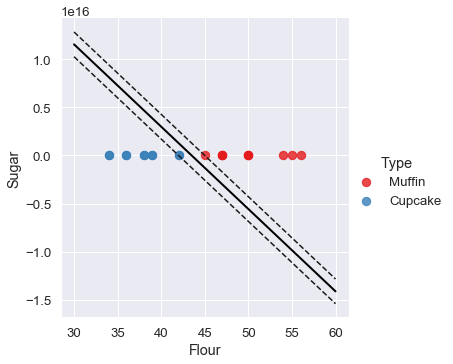

In [21]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

### Create a function to predict muffin or cupcake

In [24]:
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) == 0:
        print("You're looking at a muffin recipe.")
    else:
        print("You're looking at a cupcake recipe.")

In [25]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe.


### Let's plot this on the graph

/Users/austinjung/.pyenv/versions/3.6.9/envs/ciitizen-document-classification-service/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


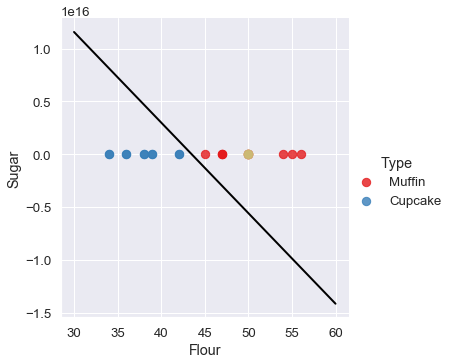

In [35]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9')